# Import Library

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from FFNN.Model import FFNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from collections import defaultdict
from sklearn.neural_network import MLPClassifier

# Implementation from Scratch

In [71]:
mnist = fetch_openml("mnist_784", parser='auto')
X = mnist.data.astype(np.float32)
y = mnist.target.astype(np.int32)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42,
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Pengujian

## 1. Pengujian Pengaruh Depth dan Width


=== 1. Pengujian Pengaruh Depth dan Width ===

Testing 1 Hidden (16 neurons)...
Epoch 1/10, Loss: 0.40812722243523214
Epoch 2/10, Loss: 0.3127265234558234
Epoch 3/10, Loss: 0.2709150938999735
Epoch 4/10, Loss: 0.24450181909934712
Epoch 5/10, Loss: 0.22568198538801226
Epoch 6/10, Loss: 0.2112433197503635
Epoch 7/10, Loss: 0.1998334196962193
Epoch 8/10, Loss: 0.19046200588648127
Epoch 9/10, Loss: 0.1825280124817689
Epoch 10/10, Loss: 0.17579418965903157
Accuracy: 0.9383

Testing 1 Hidden (64 neurons)...
Epoch 1/10, Loss: 0.3537535835879135
Epoch 2/10, Loss: 0.26580434984259416
Epoch 3/10, Loss: 0.22320280783433463
Epoch 4/10, Loss: 0.19429643032103472
Epoch 5/10, Loss: 0.17274259392982738
Epoch 6/10, Loss: 0.15600557319246788
Epoch 7/10, Loss: 0.14261891923208408
Epoch 8/10, Loss: 0.1315923845047925
Epoch 9/10, Loss: 0.12234047852593981
Epoch 10/10, Loss: 0.11433686781441334
Accuracy: 0.9531

Testing 1 Hidden (128 neurons)...
Epoch 1/10, Loss: 0.3324654333377965
Epoch 2/10, Loss: 0.2530

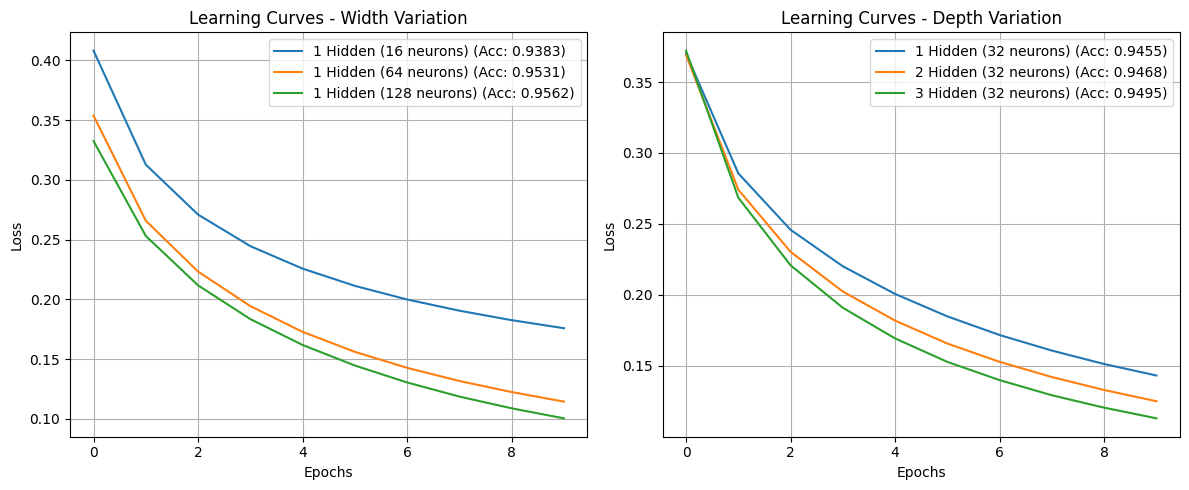

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

print("\n=== 1. Pengujian Pengaruh Depth dan Width ===")

width_models = [
    {"layers": [784, 16, 10], "name": "1 Hidden (16 neurons)"},
    {"layers": [784, 64, 10], "name": "1 Hidden (64 neurons)"},
    {"layers": [784, 128, 10], "name": "1 Hidden (128 neurons)"},
]

depth_models = [
    {"layers": [784, 32, 10], "name": "1 Hidden (32 neurons)"},
    {"layers": [784, 32, 32, 10], "name": "2 Hidden (32 neurons)"},
    {"layers": [784, 32, 32, 32, 10], "name": "3 Hidden (32 neurons)"},
]

# Konversi label ke ndarray (pastikan formatnya benar)
y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int)

width_results = []
for config in width_models:
    print(f"\nTesting {config['name']}...")
    model = FFNN(
        layers=config["layers"],
        activations=["relu"] * (len(config["layers"]) - 2) + ["softmax"],
        loss="categorical_cross_entropy",
        init_method="he",
        seed=42
    )

    history = model.train(X_train, y_train, epochs=10, lr=0.01, batch_size=32, verbose=1)

    y_pred = model.predict(X_test)
    if y_pred.ndim > 1:
        y_pred = np.argmax(y_pred, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    width_results.append({"config": config, "accuracy": accuracy, "history": history})

    print(f"Accuracy: {accuracy:.4f}")

depth_results = []
for config in depth_models:
    print(f"\nTesting {config['name']}...")
    model = FFNN(
        layers=config["layers"],
        activations=["relu"] * (len(config["layers"]) - 2) + ["softmax"],
        loss="categorical_cross_entropy",
        init_method="he",
        seed=42
    )

    history = model.train(X_train, y_train, epochs=10, lr=0.01, batch_size=32, verbose=1)

    y_pred = model.predict(X_test)
    if y_pred.ndim > 1:
        y_pred = np.argmax(y_pred, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    depth_results.append({"config": config, "accuracy": accuracy, "history": history})

    print(f"Accuracy: {accuracy:.4f}")

plt.figure(figsize=(12, 5))

# Grafik Variasi Width
plt.subplot(1, 2, 1)
for result in width_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title("Learning Curves - Width Variation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Grafik Variasi Depth
plt.subplot(1, 2, 2)
for result in depth_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title("Learning Curves - Depth Variation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 2. Pengujian Pengaruh Fungsi Aktivasi


=== 2. Pengujian Pengaruh Fungsi Aktivasi ===

Testing Linear activation...
Epoch 1/10, Loss: 0.3727819526946916
Epoch 2/10, Loss: 0.3157063622889458
Epoch 3/10, Loss: 0.29324821405683954
Epoch 4/10, Loss: 0.2800948597543266
Epoch 5/10, Loss: 0.2710792246839802
Epoch 6/10, Loss: 0.2645031746318078
Epoch 7/10, Loss: 0.2592421521501595
Epoch 8/10, Loss: 0.2546827856609904
Epoch 9/10, Loss: 0.2511838195400547
Epoch 10/10, Loss: 0.2485132138070644
Accuracy: 0.9183


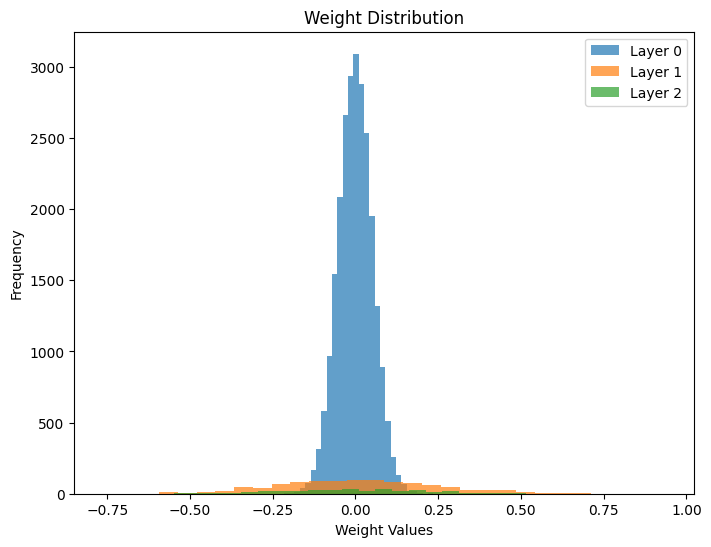

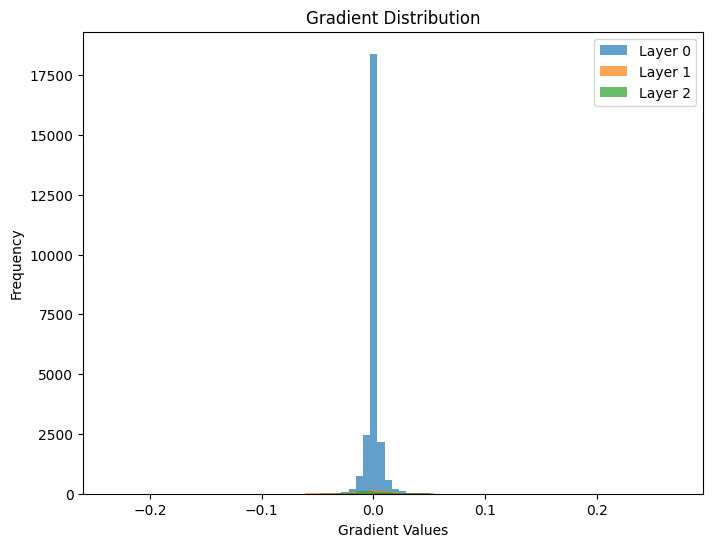


Testing ReLU activation...
Epoch 1/10, Loss: 0.36909654917324514
Epoch 2/10, Loss: 0.2741496318245741
Epoch 3/10, Loss: 0.23034269802261406
Epoch 4/10, Loss: 0.2023337423594288
Epoch 5/10, Loss: 0.18185358003037275
Epoch 6/10, Loss: 0.16570290111069347
Epoch 7/10, Loss: 0.15278744030210223
Epoch 8/10, Loss: 0.14209268932730498
Epoch 9/10, Loss: 0.13295718761563674
Epoch 10/10, Loss: 0.12503435805248456
Accuracy: 0.9468


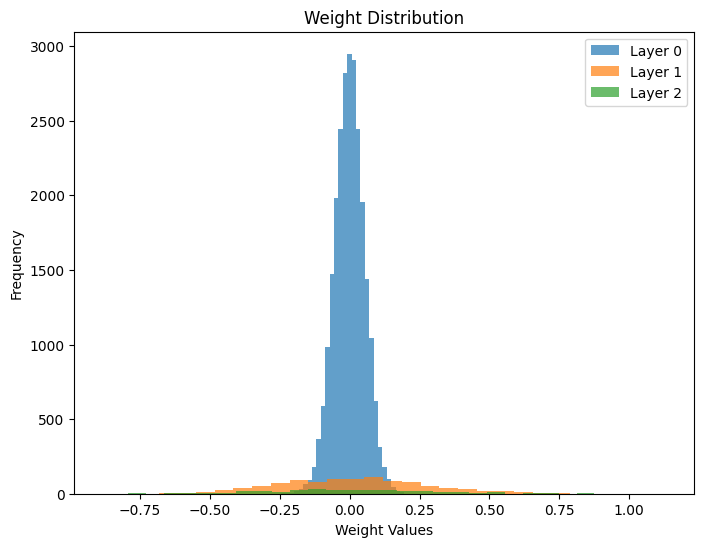

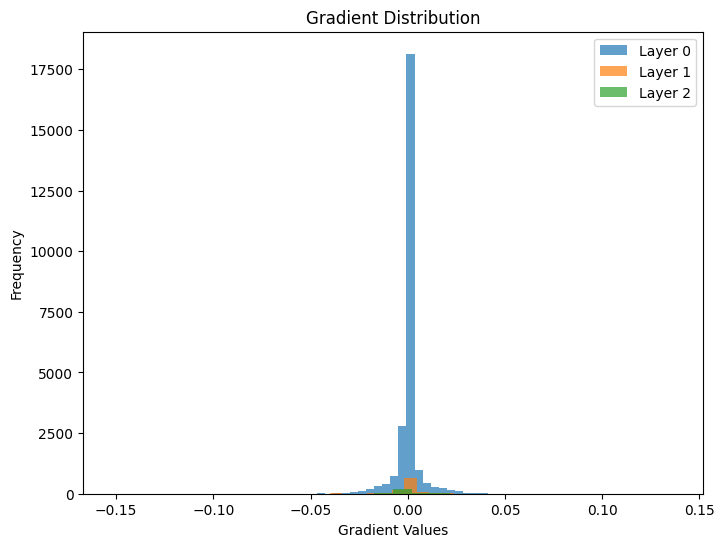


Testing Sigmoid activation...
Epoch 1/10, Loss: 1.6248893756985967
Epoch 2/10, Loss: 1.0276725458464249
Epoch 3/10, Loss: 0.7440525595733782
Epoch 4/10, Loss: 0.592489846239771
Epoch 5/10, Loss: 0.4947800434680801
Epoch 6/10, Loss: 0.4281154016971522
Epoch 7/10, Loss: 0.38168050538619935
Epoch 8/10, Loss: 0.34805145432332296
Epoch 9/10, Loss: 0.32255277274573496
Epoch 10/10, Loss: 0.30240016411402365
Accuracy: 0.9155


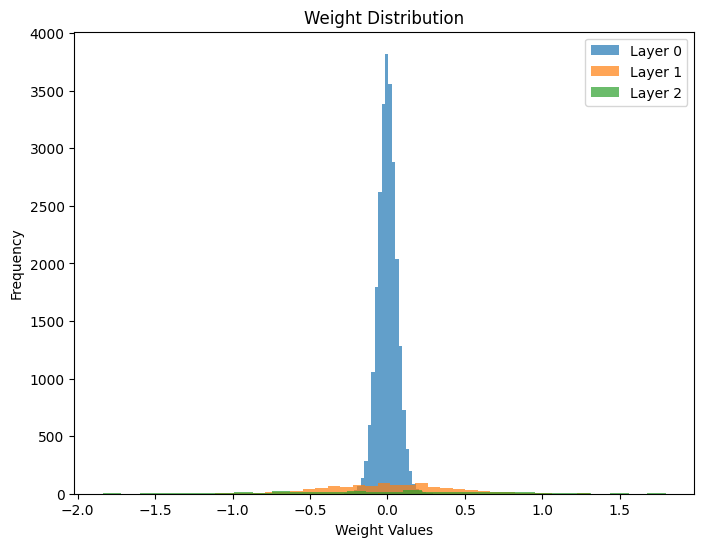

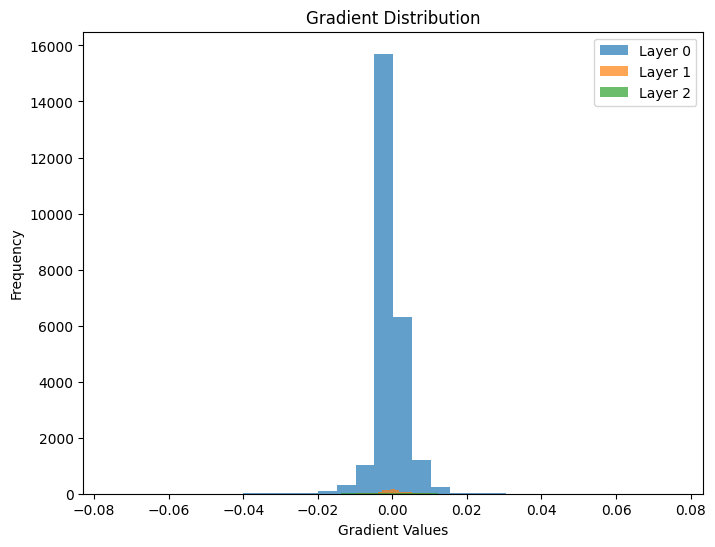


Testing Tanh activation...
Epoch 1/10, Loss: 0.43626144504678466
Epoch 2/10, Loss: 0.3086729044590973
Epoch 3/10, Loss: 0.25758052327644515
Epoch 4/10, Loss: 0.22661649601600947
Epoch 5/10, Loss: 0.20438043945498616
Epoch 6/10, Loss: 0.18712583893448267
Epoch 7/10, Loss: 0.17326871490476897
Epoch 8/10, Loss: 0.16177620375535898
Epoch 9/10, Loss: 0.15196184787021347
Epoch 10/10, Loss: 0.14344797932245484
Accuracy: 0.9426


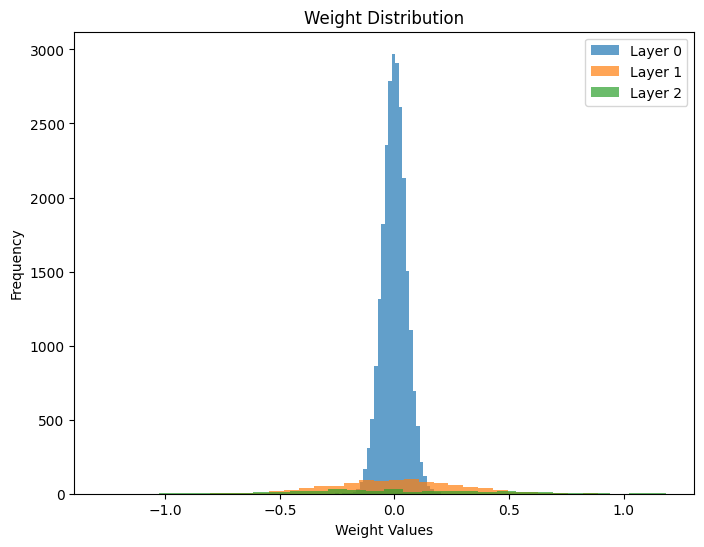

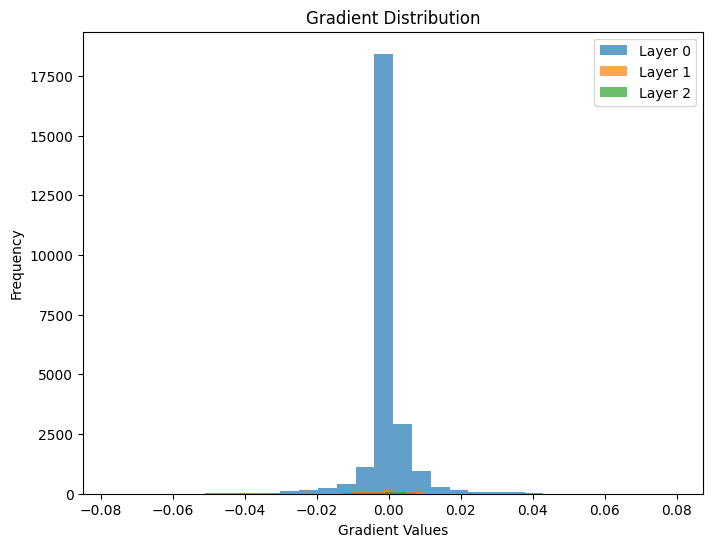


Testing Leaky ReLU activation...
Epoch 1/10, Loss: 0.3684146527772546
Epoch 2/10, Loss: 0.27404285358663033
Epoch 3/10, Loss: 0.23029367591514702
Epoch 4/10, Loss: 0.20246839419525706
Epoch 5/10, Loss: 0.18207379893103753
Epoch 6/10, Loss: 0.16599942543107896
Epoch 7/10, Loss: 0.15297086128895088
Epoch 8/10, Loss: 0.14223970386060455
Epoch 9/10, Loss: 0.13308271836353844
Epoch 10/10, Loss: 0.12507254494033412
Accuracy: 0.9466


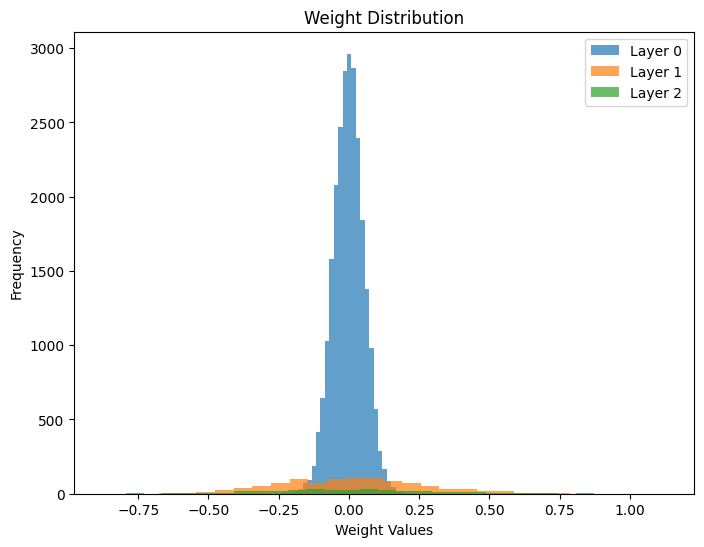

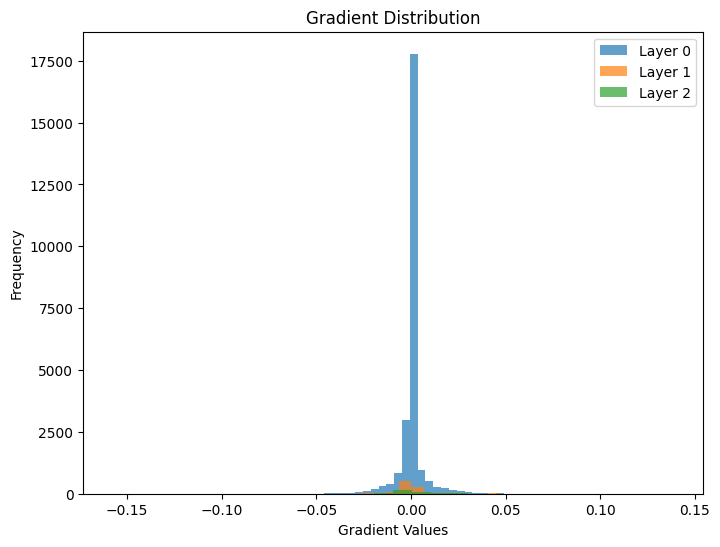


Testing ELU activation...
Epoch 1/10, Loss: 0.3467558909336324
Epoch 2/10, Loss: 0.265120872606177
Epoch 3/10, Loss: 0.22345148002202722
Epoch 4/10, Loss: 0.1949378975065853
Epoch 5/10, Loss: 0.17390520047393077
Epoch 6/10, Loss: 0.15736566260608745
Epoch 7/10, Loss: 0.1441306117382581
Epoch 8/10, Loss: 0.1332052268915423
Epoch 9/10, Loss: 0.12398596012338604
Epoch 10/10, Loss: 0.11615234077241426
Accuracy: 0.9506


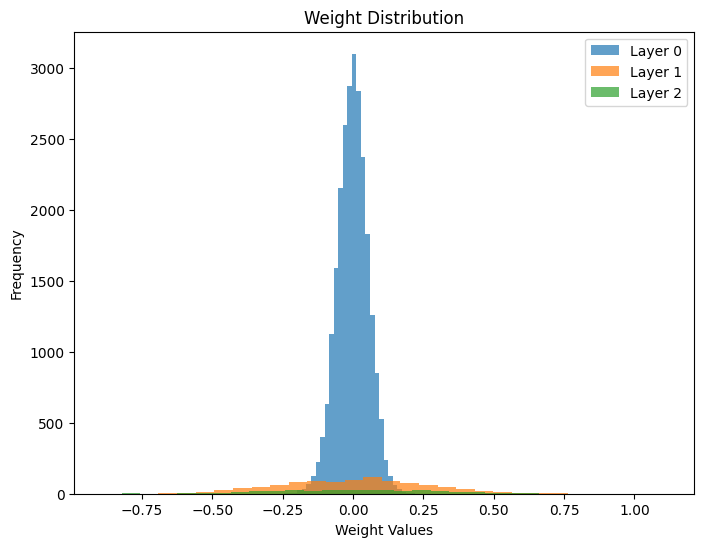

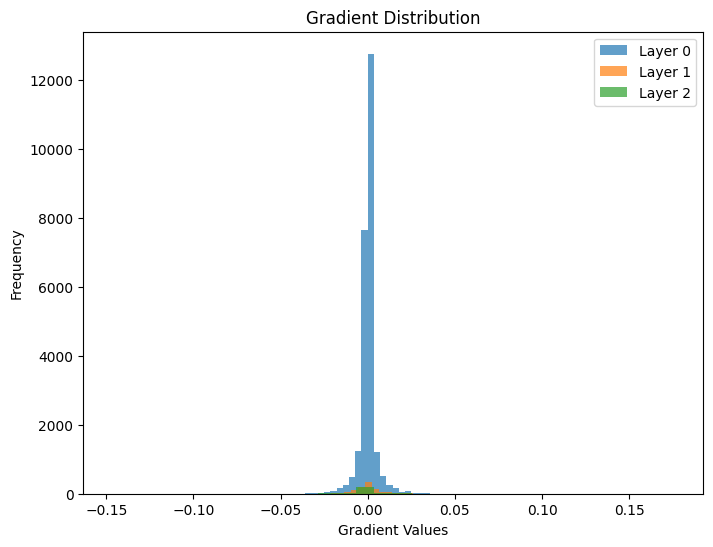


Testing Swish activation...
Epoch 1/10, Loss: 0.35663238165595884
Epoch 2/10, Loss: 0.26350532461169873
Epoch 3/10, Loss: 0.22025320495072467
Epoch 4/10, Loss: 0.19241076097524334
Epoch 5/10, Loss: 0.17185132398108247
Epoch 6/10, Loss: 0.15577941554985417
Epoch 7/10, Loss: 0.14288363762303505
Epoch 8/10, Loss: 0.13228969623236603
Epoch 9/10, Loss: 0.12326508685559455
Epoch 10/10, Loss: 0.11545046020925274
Accuracy: 0.9496


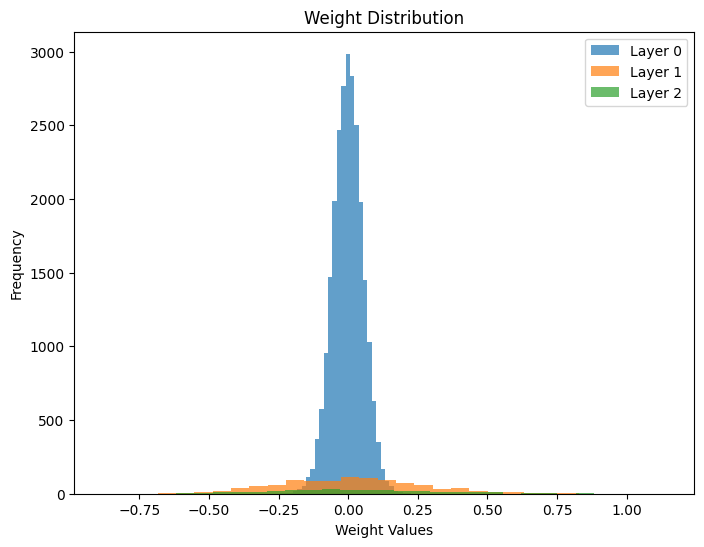

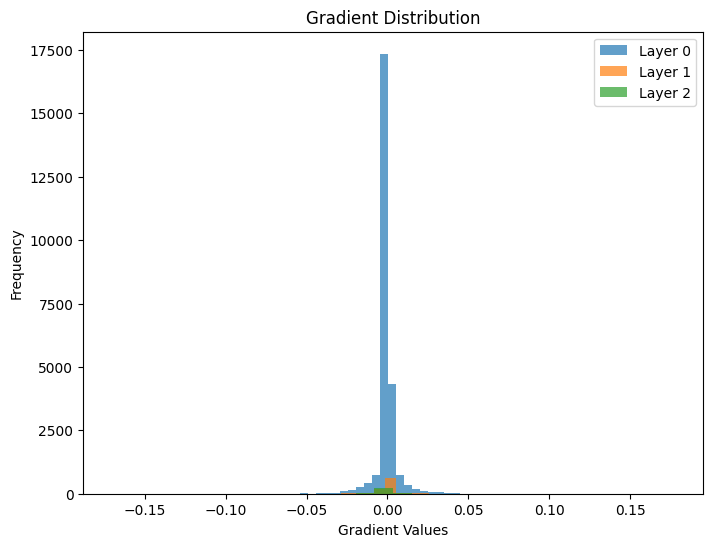

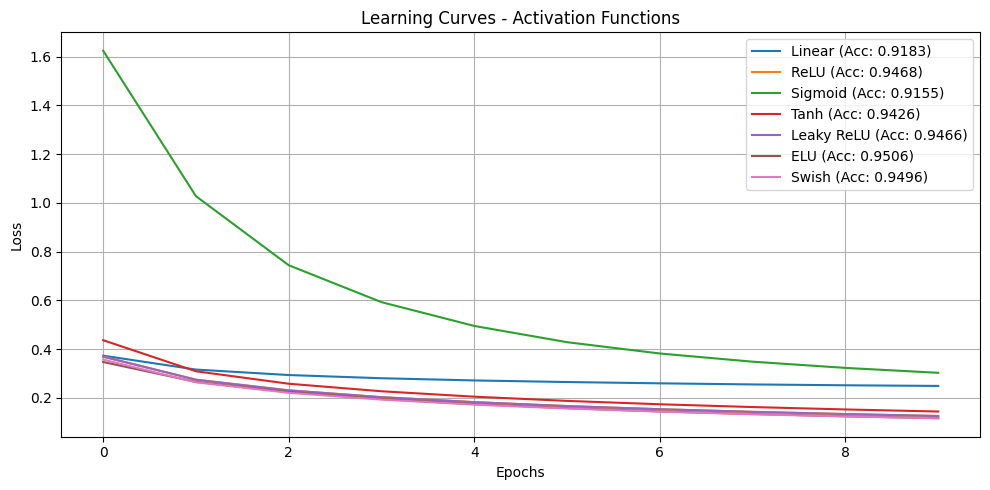


=== Perbandingan Hasil Prediksi ===
Linear: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1337, 1664, 1331, 1440, 1305, 1259, 1450, 1499, 1336, 1379]))
ReLU: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1335, 1633, 1354, 1412, 1300, 1286, 1427, 1489, 1354, 1410]))
Sigmoid: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1368, 1667, 1373, 1419, 1317, 1250, 1408, 1515, 1273, 1410]))
Tanh: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1338, 1605, 1380, 1420, 1295, 1299, 1415, 1524, 1312, 1412]))
Leaky ReLU: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1331, 1633, 1356, 1412, 1303, 1286, 1432, 1492, 1351, 1404]))
ELU: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1327, 1643, 1356, 1408, 1299, 1293, 1415, 1483, 1344, 1432]))
Swish: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1337, 1627, 1366, 1407, 1314, 1265, 1433, 1495, 1343, 1413]))


In [84]:
print("\n=== 2. Pengujian Pengaruh Fungsi Aktivasi ===")

activation_models = [
    {"activation": "linear", "name": "Linear"},
    {"activation": "relu", "name": "ReLU"},
    {"activation": "sigmoid", "name": "Sigmoid"},
    {"activation": "tanh", "name": "Tanh"},
    {"activation": "leaky_relu", "name": "Leaky ReLU"},
    {"activation": "elu", "name": "ELU"},
    {"activation": "swish", "name": "Swish"},
]

activation_results = []
weights_distributions = defaultdict(list)
gradients_distributions = defaultdict(list)
predictions = {}

for config in activation_models:
    print(f"\nTesting {config['name']} activation...")
    model = FFNN(
        layers=[784, 32, 32, 10],
        activations=[config["activation"], config["activation"], "softmax"],
        loss="categorical_cross_entropy",
        init_method="he",
        seed=42
    )

    history = model.train(X_train, y_train, epochs=10, lr=0.01, batch_size=32, verbose=1)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    predictions[config["name"]] = y_pred

    activation_results.append({"config": config, "accuracy": accuracy, "history": history})
    print(f"Accuracy: {accuracy:.4f}")

    model.plot_weight_distribution([0, 1, 2])
    model.plot_gradient_distribution([0, 1, 2])

# Plot Loss Curve
plt.figure(figsize=(10, 5))
for result in activation_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title("Learning Curves - Activation Functions")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n=== Perbandingan Hasil Prediksi ===")
for name, preds in predictions.items():
    print(f"{name}: {np.unique(preds, return_counts=True)}")

## 3. Pengujian Pengaruh Learning Rate


=== 3. Pengujian Pengaruh Learning Rate ===

Testing LR = 0.001...
Epoch 1/10, Loss: 1.3778150688019026
Epoch 2/10, Loss: 0.9235124790444698
Epoch 3/10, Loss: 0.7031031759975502
Epoch 4/10, Loss: 0.5828923058783111
Epoch 5/10, Loss: 0.510140021039499
Epoch 6/10, Loss: 0.46174218209039325
Epoch 7/10, Loss: 0.42679936058672213
Epoch 8/10, Loss: 0.40007341551021747
Epoch 9/10, Loss: 0.37867491155587896
Epoch 10/10, Loss: 0.3609478934725154
Accuracy: 0.8939


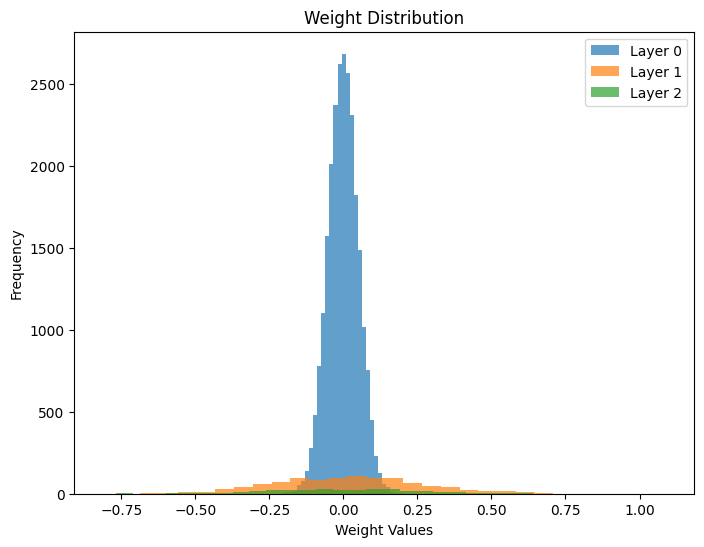

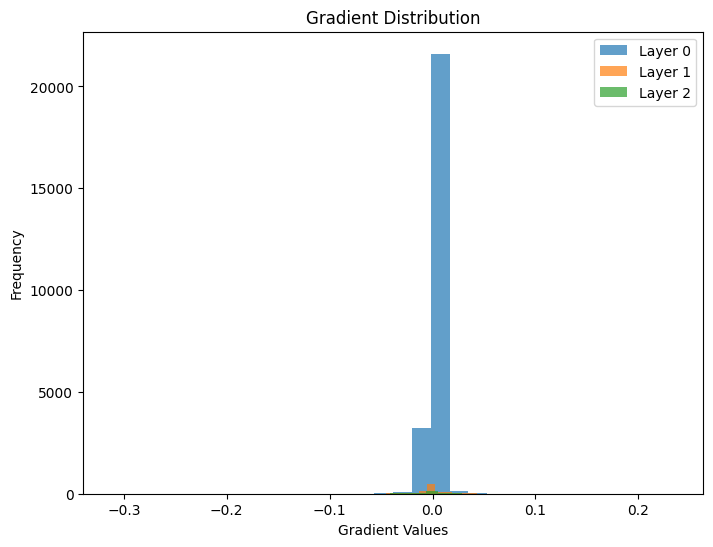


Testing LR = 0.01...
Epoch 1/10, Loss: 0.36909654917324514
Epoch 2/10, Loss: 0.2741496318245741
Epoch 3/10, Loss: 0.23034269802261406
Epoch 4/10, Loss: 0.2023337423594288
Epoch 5/10, Loss: 0.18185358003037275
Epoch 6/10, Loss: 0.16570290111069347
Epoch 7/10, Loss: 0.15278744030210223
Epoch 8/10, Loss: 0.14209268932730498
Epoch 9/10, Loss: 0.13295718761563674
Epoch 10/10, Loss: 0.12503435805248456
Accuracy: 0.9468


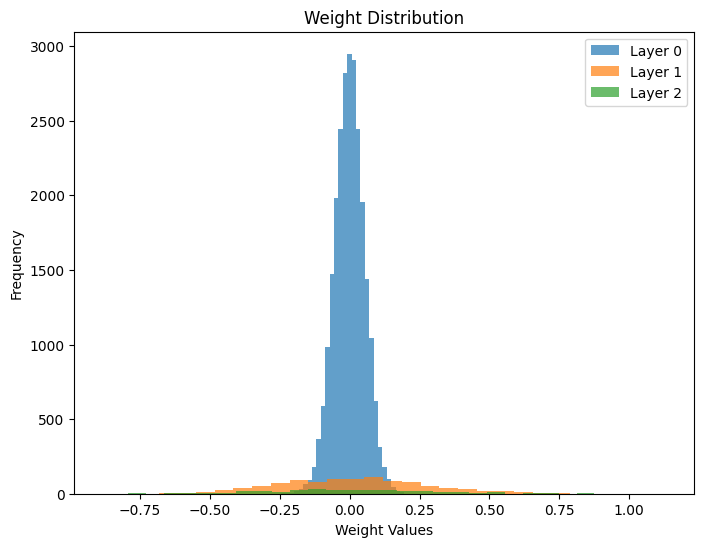

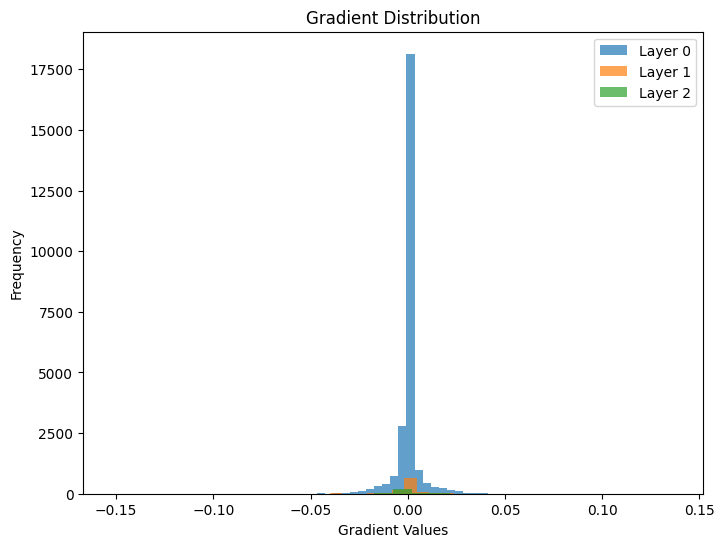


Testing LR = 0.1...
Epoch 1/10, Loss: 0.18170631389751546
Epoch 2/10, Loss: 0.1233716703450845
Epoch 3/10, Loss: 0.09837990884634694
Epoch 4/10, Loss: 0.08704588442841438
Epoch 5/10, Loss: 0.07882377237640148
Epoch 6/10, Loss: 0.0709397266464129
Epoch 7/10, Loss: 0.06965261400816171
Epoch 8/10, Loss: 0.06438596255708862
Epoch 9/10, Loss: 0.05790900427771473
Epoch 10/10, Loss: 0.051897092272967654
Accuracy: 0.9554


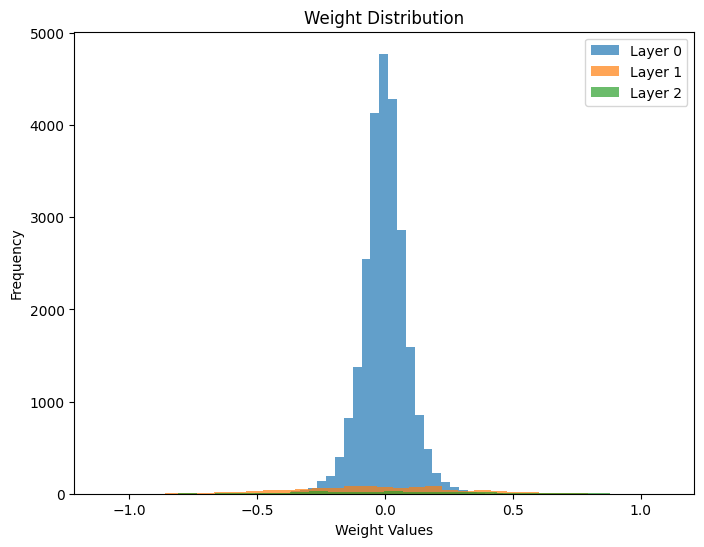

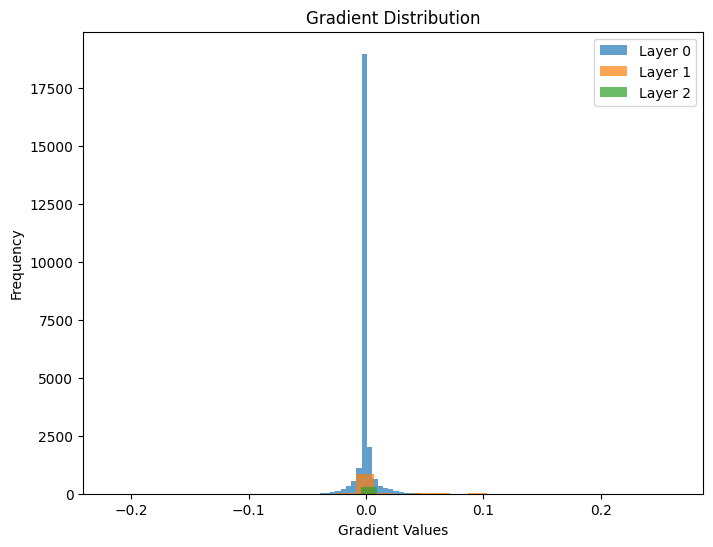

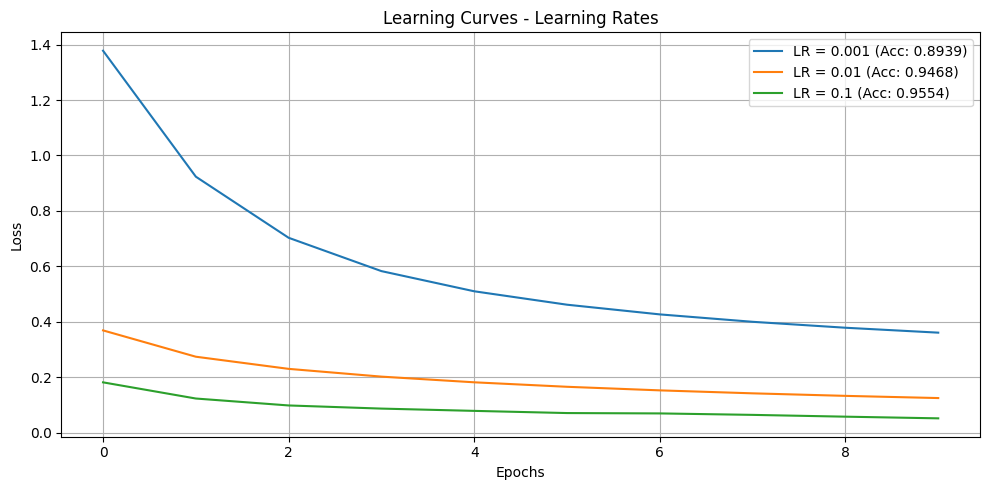


=== Perbandingan Hasil Prediksi ===
LR = 0.001: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1358, 1671, 1314, 1400, 1317, 1297, 1434, 1484, 1298, 1427]))
LR = 0.01: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1335, 1633, 1354, 1412, 1300, 1286, 1427, 1489, 1354, 1410]))
LR = 0.1: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1324, 1637, 1338, 1427, 1353, 1261, 1436, 1476, 1385, 1363]))


In [86]:
print("\n=== 3. Pengujian Pengaruh Learning Rate ===")

lr_models = [
    {"lr": 0.001, "name": "LR = 0.001"},
    {"lr": 0.01, "name": "LR = 0.01"},
    {"lr": 0.1, "name": "LR = 0.1"},
]

lr_results = []
weights_distributions = defaultdict(list)
gradients_distributions = defaultdict(list)
predictions = {}

for config in lr_models:
    print(f"\nTesting {config['name']}...")
    model = FFNN(
        layers=[784, 32, 32, 10],
        activations=["relu", "relu", "softmax"],
        loss="categorical_cross_entropy",
        init_method="he",
        seed=42
    )

    history = model.train(X_train, y_train, epochs=10, lr=config["lr"], batch_size=32, verbose=1)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    predictions[config["name"]] = y_pred

    lr_results.append({"config": config, "accuracy": accuracy, "history": history})
    print(f"Accuracy: {accuracy:.4f}")

    model.plot_weight_distribution([0, 1, 2])
    model.plot_gradient_distribution([0, 1, 2])

# Plot Loss Curve
plt.figure(figsize=(10, 5))
for result in lr_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title("Learning Curves - Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n=== Perbandingan Hasil Prediksi ===")
for name, preds in predictions.items():
    print(f"{name}: {np.unique(preds, return_counts=True)}")

## 4. Pengujian Pengaruh Inisialisasi Bobot


=== 4. Pengujian Pengaruh Inisialisasi Bobot ===

Testing Zero initialization...
Epoch 1/10, Loss: 2.301263871610762
Epoch 2/10, Loss: 2.3012365034096565
Epoch 3/10, Loss: 2.3012370188989597
Epoch 4/10, Loss: 2.301237198331156
Epoch 5/10, Loss: 2.301237222709291
Epoch 6/10, Loss: 2.3012372252368003
Epoch 7/10, Loss: 2.301237225383412
Epoch 8/10, Loss: 2.301237225360693
Epoch 9/10, Loss: 2.3012372253486864
Epoch 10/10, Loss: 2.3012372253452145
Accuracy: 0.1143


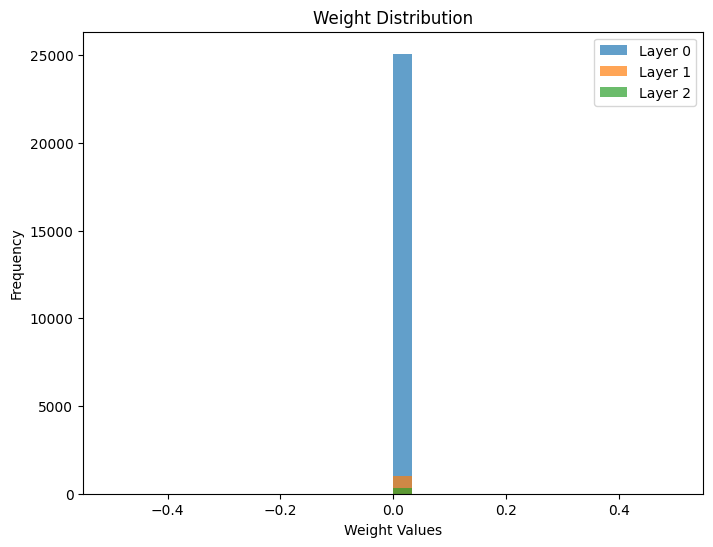

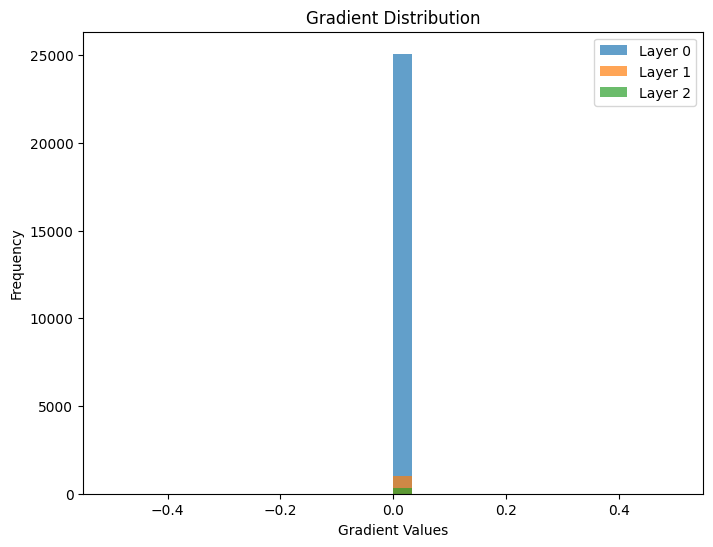


Testing Uniform initialization...
Epoch 1/10, Loss: 1.0310754929879433
Epoch 2/10, Loss: 0.6843913409179414
Epoch 3/10, Loss: 0.5511935637616591
Epoch 4/10, Loss: 0.47679763173073036
Epoch 5/10, Loss: 0.4279203918173812
Epoch 6/10, Loss: 0.3910001476785288
Epoch 7/10, Loss: 0.3612195737896667
Epoch 8/10, Loss: 0.3367349644204398
Epoch 9/10, Loss: 0.31640995682925993
Epoch 10/10, Loss: 0.29882696205492587
Accuracy: 0.9048


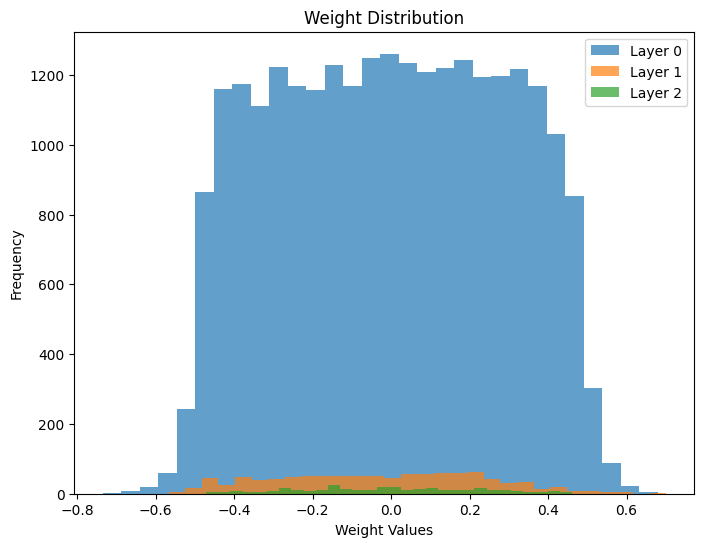

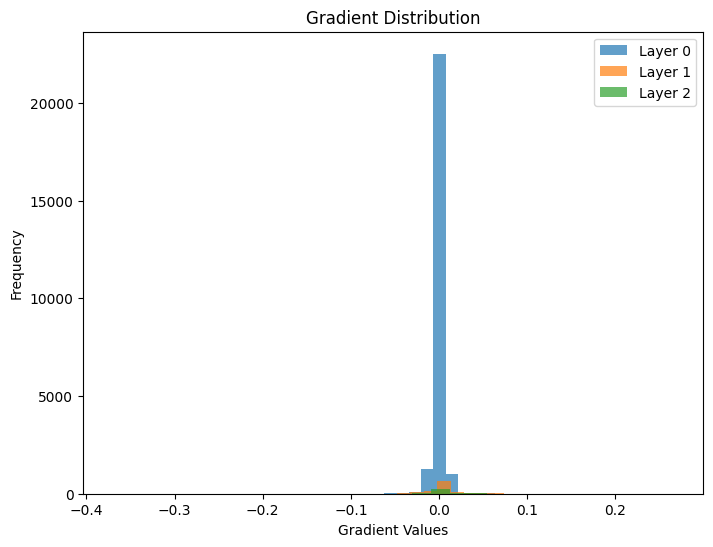


Testing Normal initialization...
Epoch 1/10, Loss: 1.1210872389689996
Epoch 2/10, Loss: 0.7268697299344664
Epoch 3/10, Loss: 0.5688427588582161
Epoch 4/10, Loss: 0.48299088754255926
Epoch 5/10, Loss: 0.4275086775592403
Epoch 6/10, Loss: 0.38849217121628293
Epoch 7/10, Loss: 0.35901173543053827
Epoch 8/10, Loss: 0.33505087183655585
Epoch 9/10, Loss: 0.3150297994396995
Epoch 10/10, Loss: 0.2980557890587045
Accuracy: 0.9034


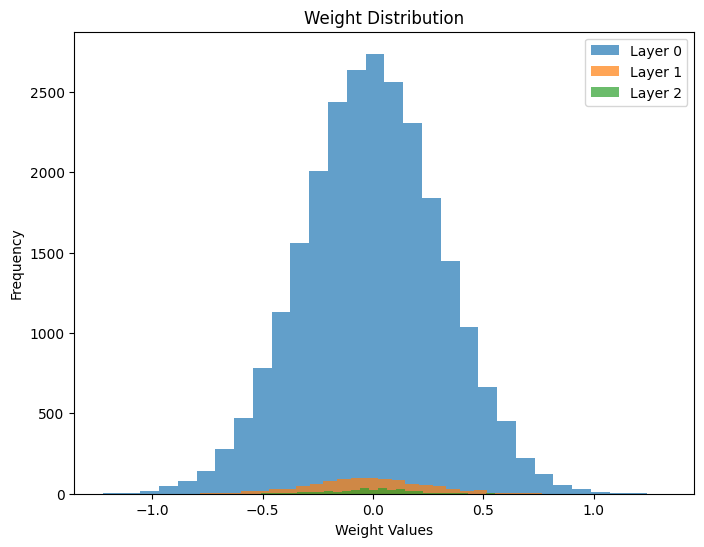

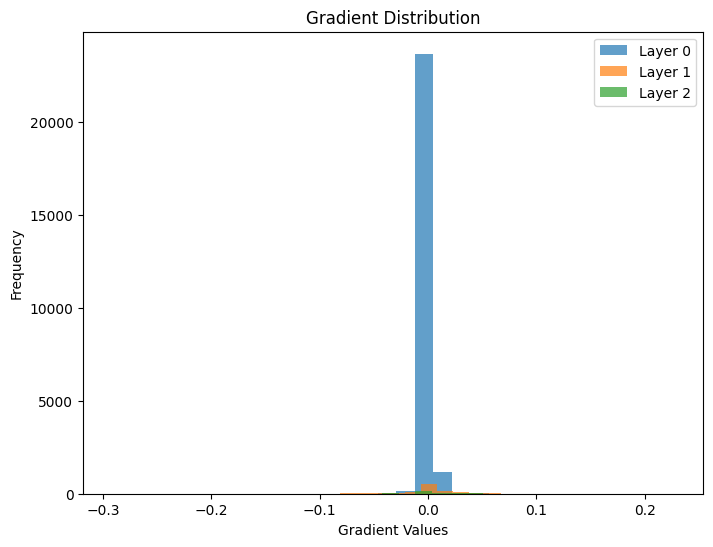


Testing He initialization...
Epoch 1/10, Loss: 0.36909654917324514
Epoch 2/10, Loss: 0.2741496318245741
Epoch 3/10, Loss: 0.23034269802261406
Epoch 4/10, Loss: 0.2023337423594288
Epoch 5/10, Loss: 0.18185358003037275
Epoch 6/10, Loss: 0.16570290111069347
Epoch 7/10, Loss: 0.15278744030210223
Epoch 8/10, Loss: 0.14209268932730498
Epoch 9/10, Loss: 0.13295718761563674
Epoch 10/10, Loss: 0.12503435805248456
Accuracy: 0.9468


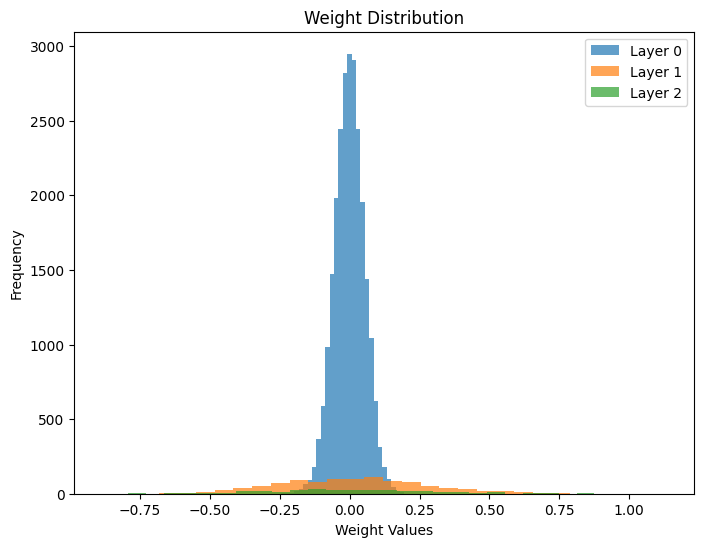

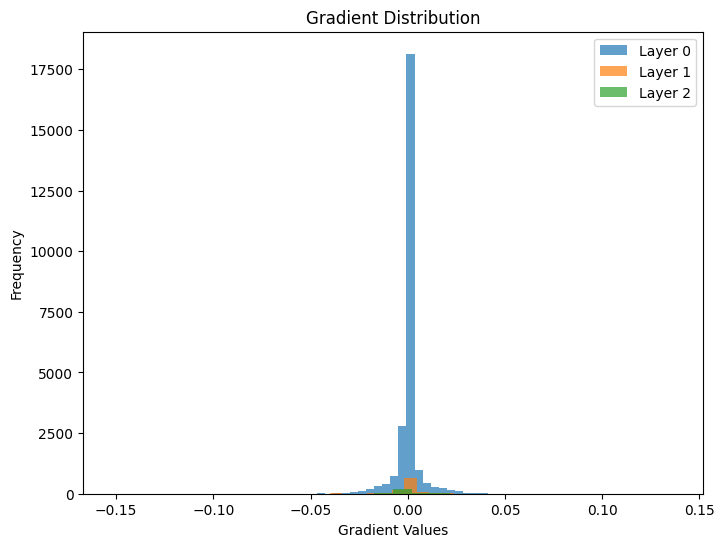


Testing Xavier initialization...
Epoch 1/10, Loss: 0.3644585356452817
Epoch 2/10, Loss: 0.2670339157480687
Epoch 3/10, Loss: 0.221113324690119
Epoch 4/10, Loss: 0.1916809508903009
Epoch 5/10, Loss: 0.17042088266931196
Epoch 6/10, Loss: 0.1540184186247685
Epoch 7/10, Loss: 0.14096445371972313
Epoch 8/10, Loss: 0.1302067963493975
Epoch 9/10, Loss: 0.12099896897339367
Epoch 10/10, Loss: 0.11317313598416164
Accuracy: 0.9531


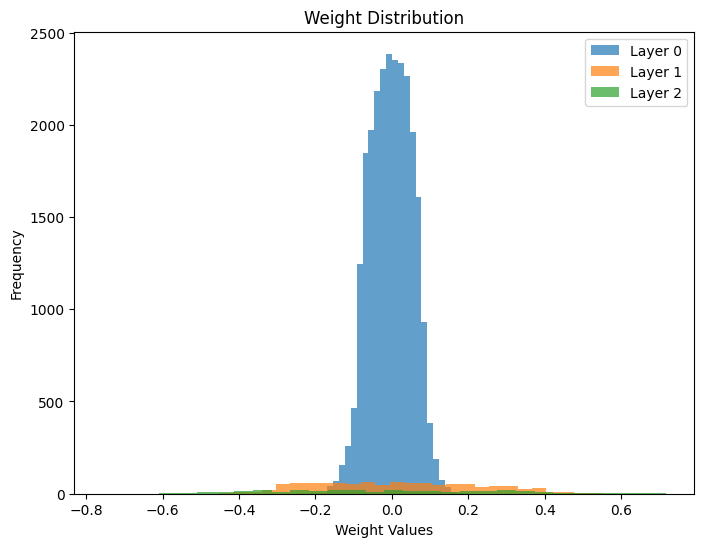

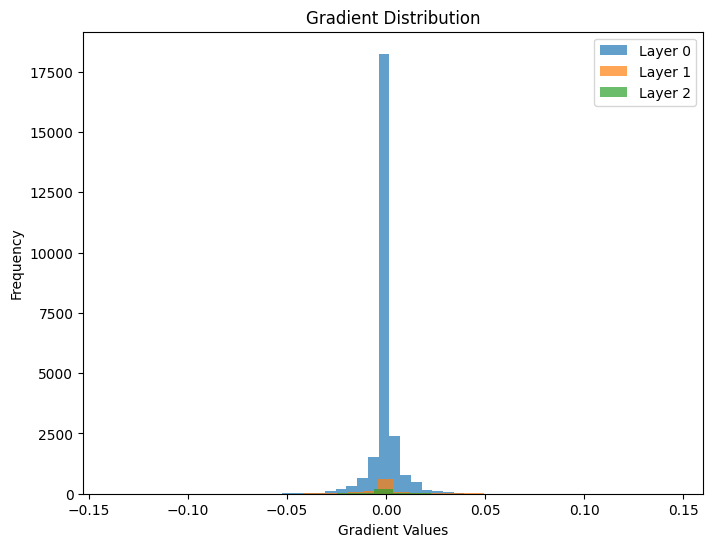

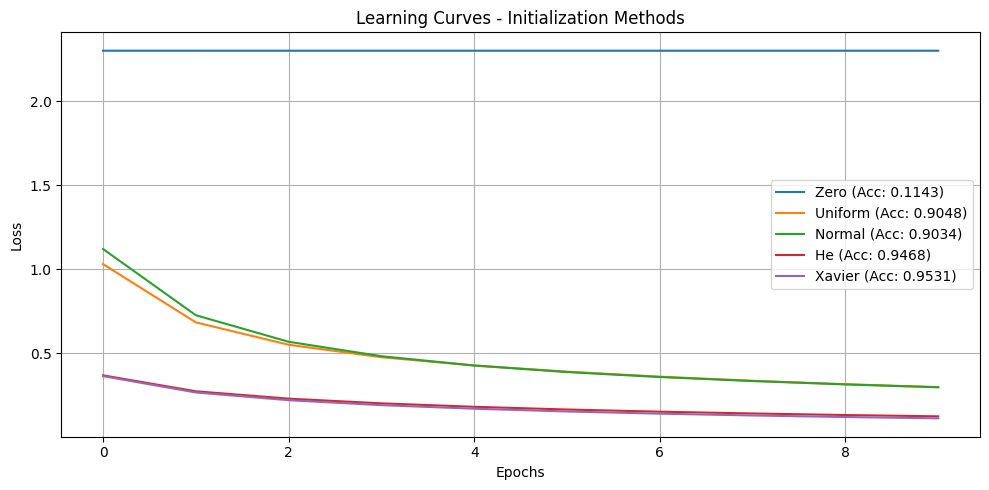


=== Perbandingan Hasil Prediksi ===
Zero: (array([1]), array([14000]))
Uniform: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1353, 1634, 1254, 1450, 1327, 1256, 1475, 1543, 1379, 1329]))
Normal: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1346, 1687, 1305, 1481, 1373, 1285, 1457, 1484, 1273, 1309]))
He: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1335, 1633, 1354, 1412, 1300, 1286, 1427, 1489, 1354, 1410]))
Xavier: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1341, 1626, 1362, 1418, 1307, 1270, 1426, 1493, 1327, 1430]))


In [81]:
print("\n=== 4. Pengujian Pengaruh Inisialisasi Bobot ===")

init_models = [
    {"method": "zero", "name": "Zero", "kwargs": {}},
    {"method": "uniform", "name": "Uniform", "kwargs": {"seed": 42, "lower": -0.5, "upper": 0.5}},
    {"method": "normal", "name": "Normal", "kwargs": {"seed": 42, "mean": 0.0, "variance": 0.1}},
    {"method": "he", "name": "He", "kwargs": {"seed": 42}},
    {"method": "xavier", "name": "Xavier", "kwargs": {"seed": 42}},
]

init_results = []
weights_distributions = defaultdict(list)
gradients_distributions = defaultdict(list)
predictions = {}

for config in init_models:
    print(f"\nTesting {config['name']} initialization...")

    model = FFNN(
        layers=[784, 32, 32, 10],
        activations=["relu", "relu", "softmax"],
        loss="categorical_cross_entropy",
        init_method=config["method"],
        **config["kwargs"]
    )

    history = model.train(X_train, y_train, epochs=10, lr=0.01, batch_size=32, verbose=1)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    predictions[config["name"]] = y_pred

    init_results.append({"config": config, "accuracy": accuracy, "history": history})
    print(f"Accuracy: {accuracy:.4f}")

    model.plot_weight_distribution([0, 1, 2])
    model.plot_gradient_distribution([0, 1, 2])

# Plot Loss Curve
plt.figure(figsize=(10, 5))
for result in init_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title("Learning Curves - Initialization Methods")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n=== Perbandingan Hasil Prediksi ===")
for name, preds in predictions.items():
    print(f"{name}: {np.unique(preds, return_counts=True)}")

## 5. Pengujian Pengaruh Regularisasi


=== 5. Pengujian Pengaruh Regularisasi ===

Testing No Regularization...
Epoch 1/10, Loss: 0.36909654917324514
Epoch 2/10, Loss: 0.2741496318245741
Epoch 3/10, Loss: 0.23034269802261406
Epoch 4/10, Loss: 0.2023337423594288
Epoch 5/10, Loss: 0.18185358003037275
Epoch 6/10, Loss: 0.16570290111069347
Epoch 7/10, Loss: 0.15278744030210223
Epoch 8/10, Loss: 0.14209268932730498
Epoch 9/10, Loss: 0.13295718761563674
Epoch 10/10, Loss: 0.12503435805248456
Accuracy: 0.9468


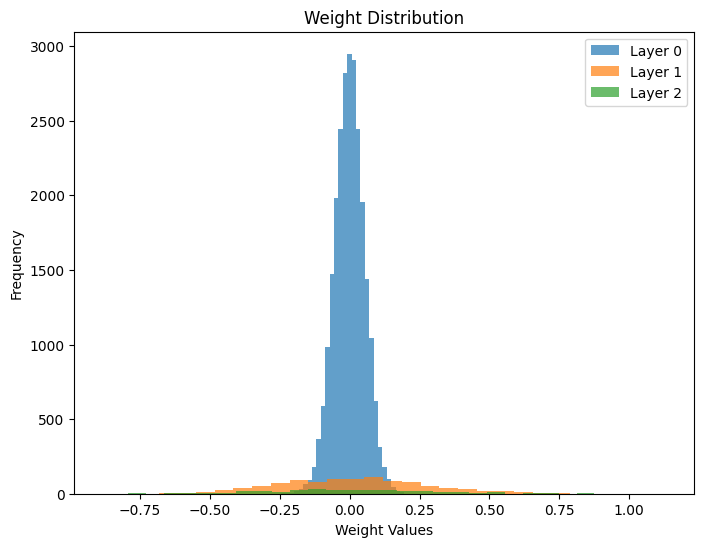

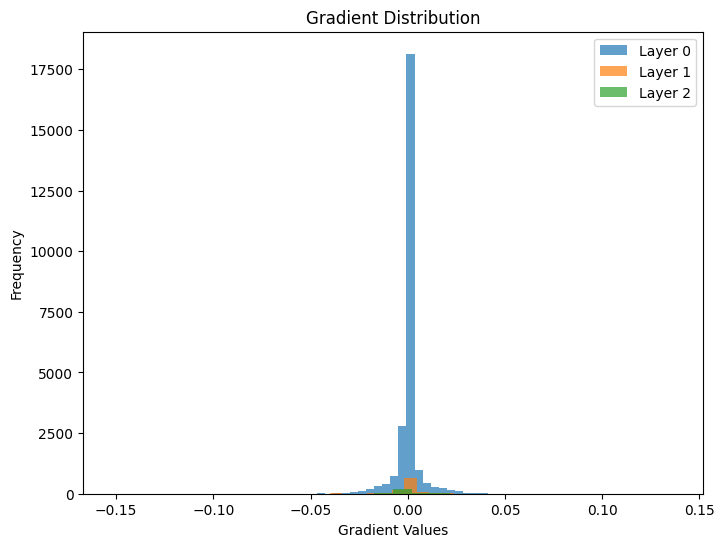


Testing L1 Regularization...
Epoch 1/10, Loss: 0.5505092193114931
Epoch 2/10, Loss: 0.4952882999747858
Epoch 3/10, Loss: 0.4626262333652229
Epoch 4/10, Loss: 0.4456059847114469
Epoch 5/10, Loss: 0.436129086675042
Epoch 6/10, Loss: 0.42989495193329924
Epoch 7/10, Loss: 0.4251775380740095
Epoch 8/10, Loss: 0.4205002390483669
Epoch 9/10, Loss: 0.4155468175118687
Epoch 10/10, Loss: 0.41115998814188237
Accuracy: 0.8909


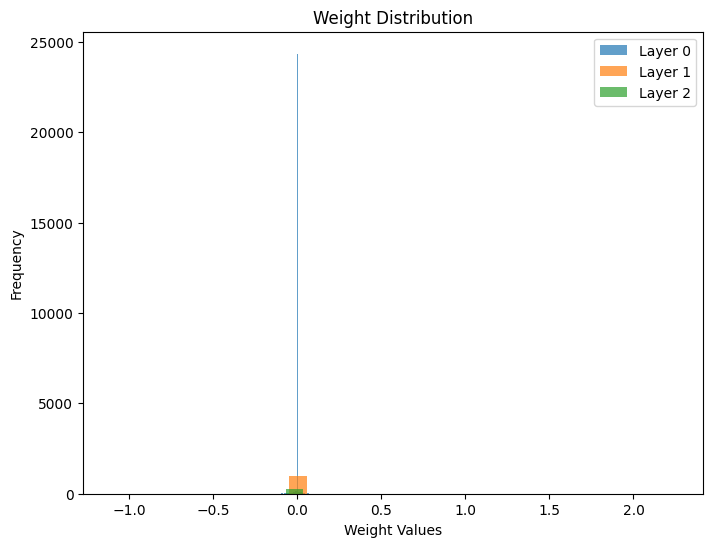

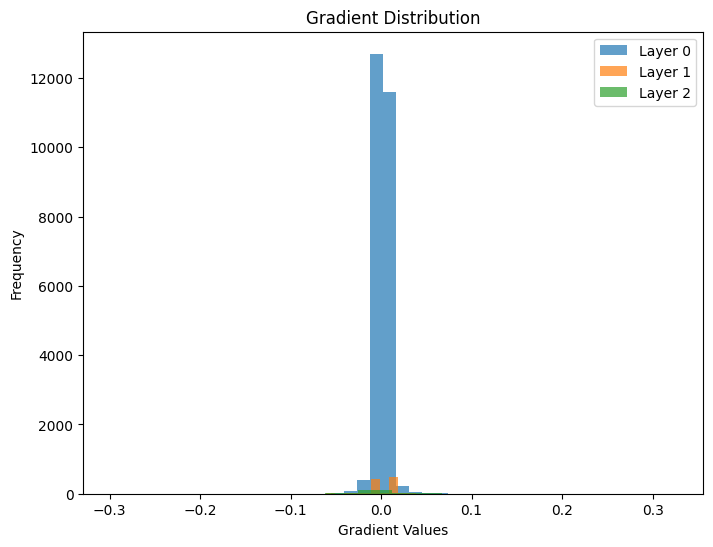


Testing L2 Regularization...
Epoch 1/10, Loss: 0.3714829529552576
Epoch 2/10, Loss: 0.2815588359415315
Epoch 3/10, Loss: 0.24512161127207105
Epoch 4/10, Loss: 0.22445989277016917
Epoch 5/10, Loss: 0.21085123205135553
Epoch 6/10, Loss: 0.20111184085884407
Epoch 7/10, Loss: 0.19364498883427586
Epoch 8/10, Loss: 0.18783244009379152
Epoch 9/10, Loss: 0.18322898722210004
Epoch 10/10, Loss: 0.17935570530154338
Accuracy: 0.9435


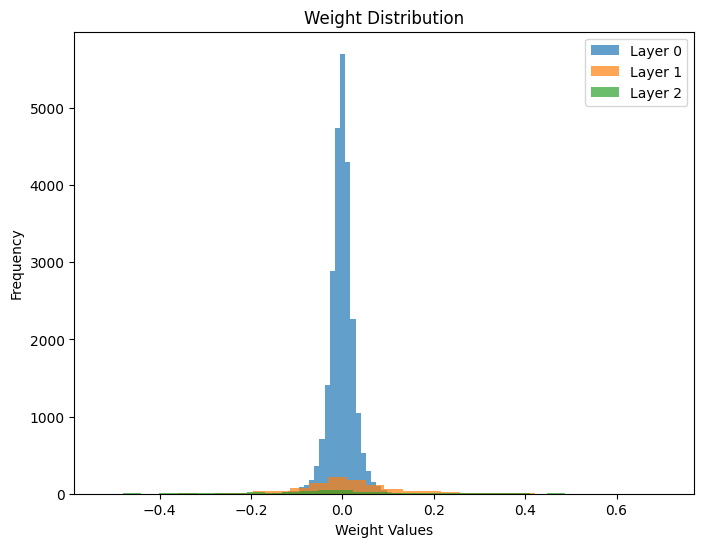

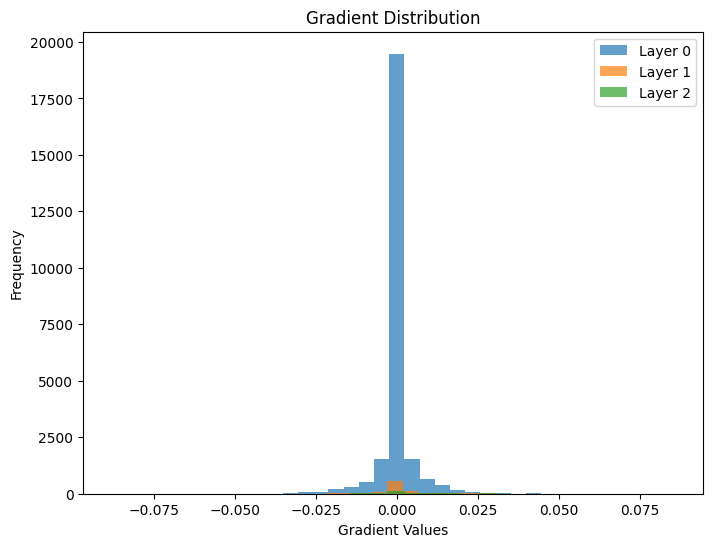

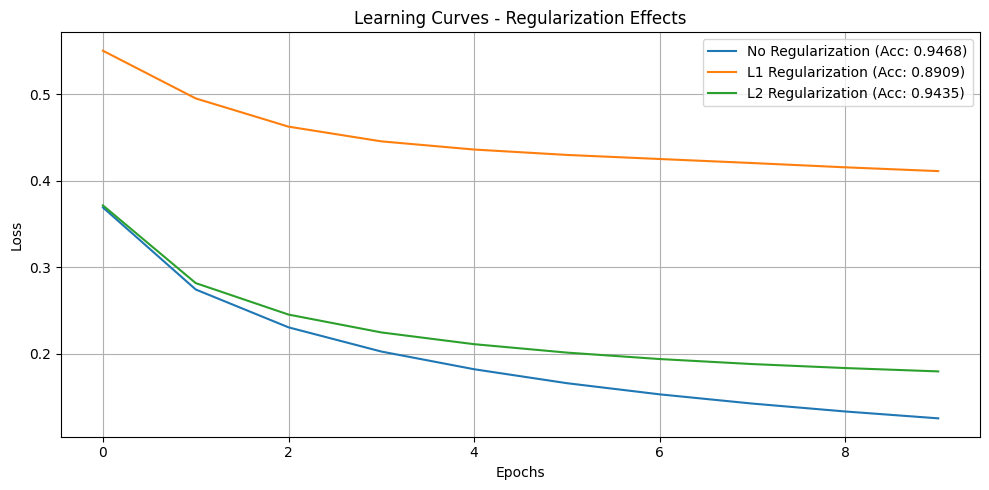


=== Perbandingan Hasil Prediksi ===
No Regularization: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1335, 1633, 1354, 1412, 1300, 1286, 1427, 1489, 1354, 1410]))
L1 Regularization: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1372, 1727, 1322, 1429, 1341, 1259, 1435, 1427, 1269, 1419]))
L2 Regularization: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1348, 1658, 1363, 1394, 1317, 1273, 1429, 1478, 1324, 1416]))


In [88]:
print("\n=== 5. Pengujian Pengaruh Regularisasi ===")

regularization_models = [
    {"l1_lambda": 0.0, "l2_lambda": 0.0, "name": "No Regularization"},
    {"l1_lambda": 0.01, "l2_lambda": 0.0, "name": "L1 Regularization"},
    {"l1_lambda": 0.0, "l2_lambda": 0.01, "name": "L2 Regularization"},
]

regularization_results = []
weights_distributions = defaultdict(list)
gradients_distributions = defaultdict(list)
predictions = {}

for config in regularization_models:
    print(f"\nTesting {config['name']}...")
    model = FFNN(
        layers=[784, 32, 32, 10],
        activations=["relu", "relu", "softmax"],
        loss="categorical_cross_entropy",
        init_method="he",
        seed=42,
        l1_lambda=config["l1_lambda"],
        l2_lambda=config["l2_lambda"]
    )

    history = model.train(X_train, y_train, epochs=10, lr=0.01, batch_size=32, verbose=1)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    predictions[config["name"]] = y_pred

    regularization_results.append({"config": config, "accuracy": accuracy, "history": history})
    print(f"Accuracy: {accuracy:.4f}")

    model.plot_weight_distribution([0, 1, 2])
    model.plot_gradient_distribution([0, 1, 2])

# Plot Loss Curve
plt.figure(figsize=(10, 5))
for result in regularization_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title("Learning Curves - Regularization Effects")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n=== Perbandingan Hasil Prediksi ===")
for name, preds in predictions.items():
    print(f"{name}: {np.unique(preds, return_counts=True)}")

## 6. Pengujian Pengaruh RMS_Norm


=== 6. Pengujian Pengaruh RMS_Norm ===

Testing  With RMS_Norm...
Epoch 1/10, Loss: 1.064192813603107
Epoch 2/10, Loss: 0.8217967872625824
Epoch 3/10, Loss: 0.7125253607479798
Epoch 4/10, Loss: 0.6502623540086908
Epoch 5/10, Loss: 0.609214293771609
Epoch 6/10, Loss: 0.5795258187478998
Epoch 7/10, Loss: 0.5572654150159303
Epoch 8/10, Loss: 0.5397189423189814
Epoch 9/10, Loss: 0.5253313434025376
Epoch 10/10, Loss: 0.5131542838916802
Accuracy: 0.9126


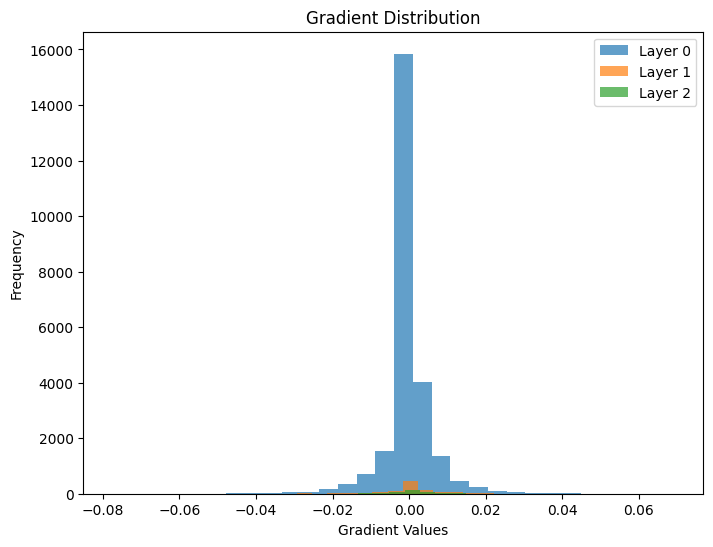

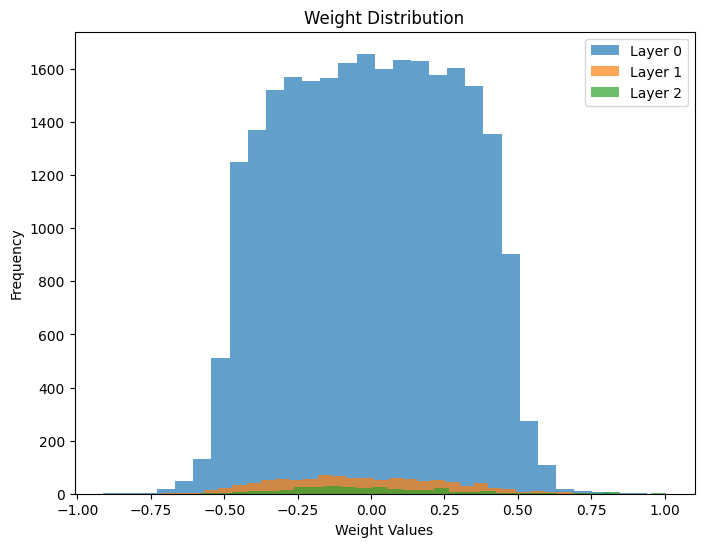


Testing Without RMS_Norm...
Epoch 1/10, Loss: 0.993953306778569
Epoch 2/10, Loss: 0.6558859894320364
Epoch 3/10, Loss: 0.525453502411716
Epoch 4/10, Loss: 0.45197872143007506
Epoch 5/10, Loss: 0.4030034433390834
Epoch 6/10, Loss: 0.36717815667095693
Epoch 7/10, Loss: 0.3394893368531744
Epoch 8/10, Loss: 0.31745367040657524
Epoch 9/10, Loss: 0.2990438781630555
Epoch 10/10, Loss: 0.2833264227381389
Accuracy: 0.9049


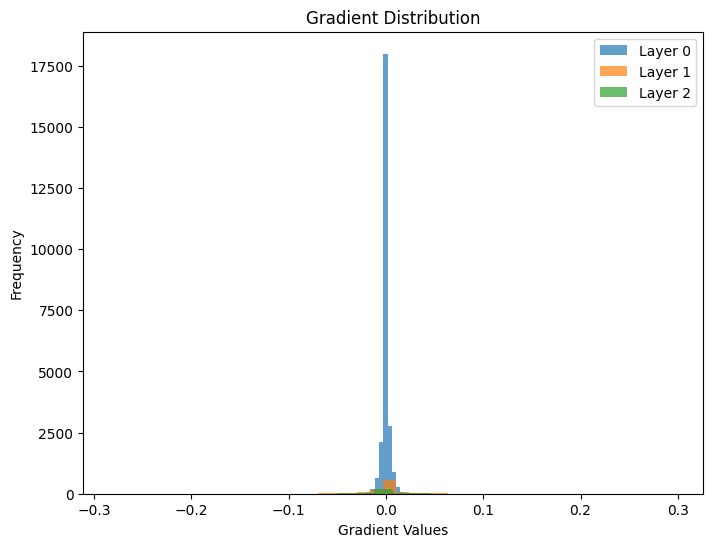

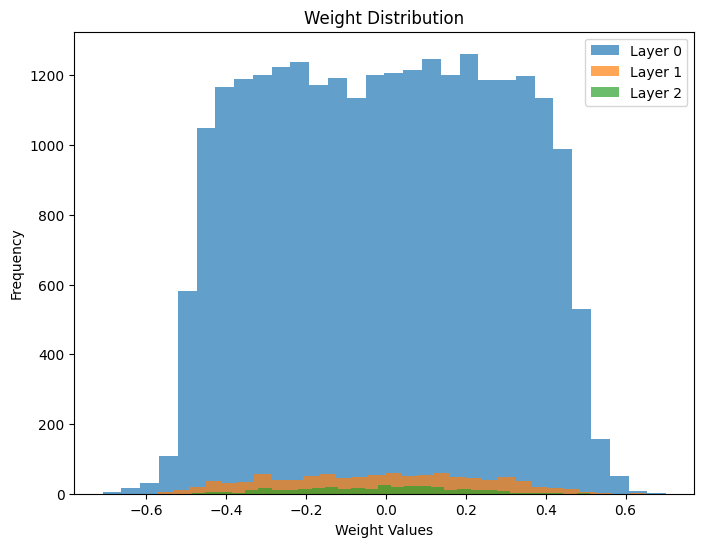

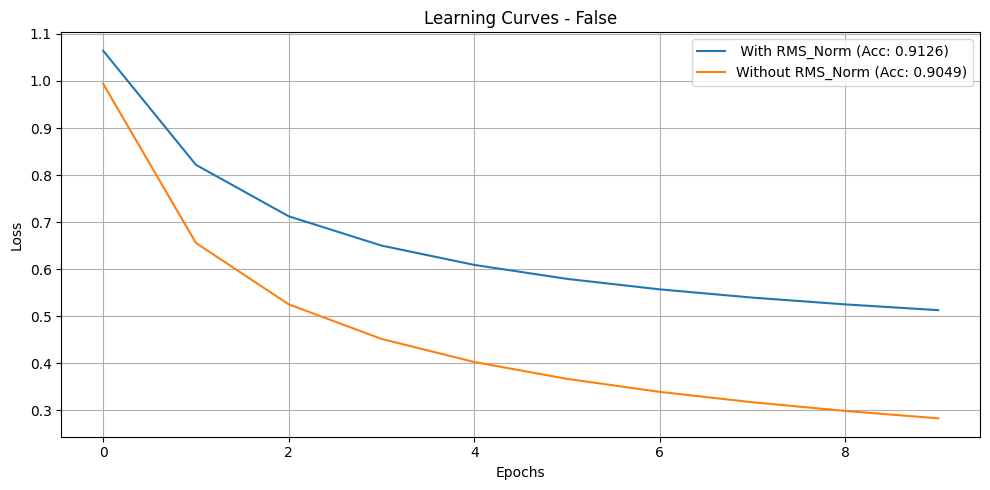

In [89]:
print("\n=== 6. Pengujian Pengaruh RMS_Norm ===")

init_models = [
    {"rms_norm": True, "name": " With RMS_Norm", "gamma": 1},
    {"rms_norm": False, "name": "Without RMS_Norm", "gamma": 0},
]

init_results = []
for config in init_models:
    print(f"\nTesting {config['name']}...")
    model = FFNN(
        layers=[784, 32, 32, 10],
        activations=["relu", "relu", "softmax"],
        loss="categorical_cross_entropy",
        rms_norm=config["rms_norm"],
        gamma=config["gamma"]
    )

    history = model.train(X_train, y_train, epochs=10, lr=0.01, batch_size=32, verbose=1)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    init_results.append({"config": config, "accuracy": accuracy, "history": history})

    print(f"Accuracy: {accuracy:.4f}")

    model.plot_gradient_distribution([0, 1, 2])
    model.plot_weight_distribution([0, 1, 2])

plt.figure(figsize=(10, 5))
for result in init_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title(f'Learning Curves - {config["rms_norm"]}')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 7. Perbandingan dengan Sklearn MLP


=== 7. Perbandingan dengan Sklearn MLP ===

=== Training Custom FFNN Model ===
Epoch 1/10, Loss: 0.36909654917324514
Epoch 2/10, Loss: 0.2741496318245741
Epoch 3/10, Loss: 0.23034269802261406
Epoch 4/10, Loss: 0.2023337423594288
Epoch 5/10, Loss: 0.18185358003037275
Epoch 6/10, Loss: 0.16570290111069347
Epoch 7/10, Loss: 0.15278744030210223
Epoch 8/10, Loss: 0.14209268932730498
Epoch 9/10, Loss: 0.13295718761563674
Epoch 10/10, Loss: 0.12503435805248456
FFNN Accuracy: 0.9468

=== Training Scikit-Learn MLPClassifier ===
MLPClassifier Accuracy: 0.9311

=== Comparison of Prediction Distributions ===
FFNN Predictions: {np.int64(0): np.int64(1335), np.int64(1): np.int64(1633), np.int64(2): np.int64(1354), np.int64(3): np.int64(1412), np.int64(4): np.int64(1300), np.int64(5): np.int64(1286), np.int64(6): np.int64(1427), np.int64(7): np.int64(1489), np.int64(8): np.int64(1354), np.int64(9): np.int64(1410)}
MLP Predictions: {np.int64(0): np.int64(1306), np.int64(1): np.int64(1595), np.int64(2

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


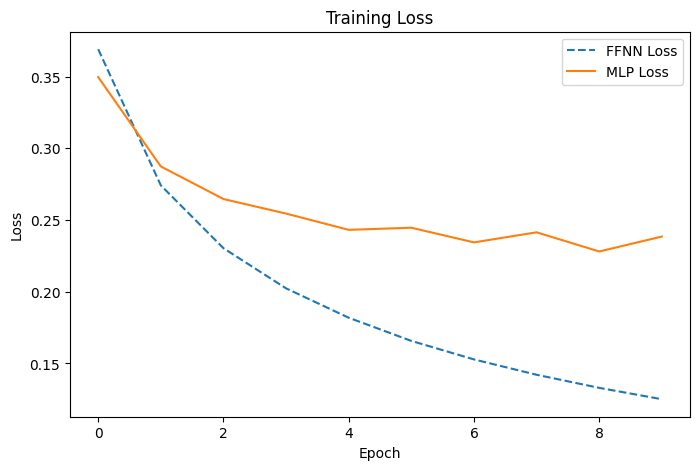

In [93]:
print("\n=== 7. Perbandingan dengan Sklearn MLP ===")

layers = [784, 32, 32, 10]
activation = "relu"
learning_rate = 0.01
epochs = 10
batch_size = 32
seed = 42

# Train FFNN Model Scratch
print("\n=== Training Custom FFNN Model ===")
ffnn = FFNN(
    layers=layers,
    activations=[activation, activation, "softmax"],
    loss="categorical_cross_entropy",
    init_method="he",
    seed=seed
)
ffnn_history = ffnn.train(X_train, y_train, epochs=epochs, lr=learning_rate, batch_size=batch_size, verbose=1)
ffnn_pred = ffnn.predict(X_test)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred)

print(f"FFNN Accuracy: {ffnn_accuracy:.4f}")

# Train Scikit-learn MLP Model
print("\n=== Training Scikit-Learn MLPClassifier ===")
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 32),
    activation=activation,
    solver="adam",
    learning_rate_init=learning_rate,
    max_iter=epochs,
    batch_size=batch_size,
    random_state=seed
)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_pred)

print(f"MLPClassifier Accuracy: {mlp_accuracy:.4f}")

print("\n=== Comparison of Prediction Distributions ===")
ffnn_unique, ffnn_counts = np.unique(ffnn_pred, return_counts=True)
mlp_unique, mlp_counts = np.unique(mlp_pred, return_counts=True)
print(f"FFNN Predictions: {dict(zip(ffnn_unique, ffnn_counts))}")
print(f"MLP Predictions: {dict(zip(mlp_unique, mlp_counts))}")

plt.figure(figsize=(8, 5))
plt.plot(ffnn_history, label="FFNN Loss", linestyle="dashed")
plt.plot(mlp.loss_curve_, label="MLP Loss", linestyle="solid")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.show()